## Overview  
The below Random Forest Model is an assignment from an Udemy Machine Learning class 

https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/?utm_source=adwords&utm_medium=udemyads&utm_campaign=Python_v.PROF_la.EN_cc.US_ti.7380&utm_content=deal4584&utm_term=_._ag_78513466559_._ad_436603254913_._kw__._de_c_._dm__._pl__._ti_dsa-774930046209_._li_9030072_._pd__._&matchtype=b&gclid=Cj0KCQiA9P__BRC0ARIsAEZ6iriN81oGE4RLs6f0zCpoBHxAbJNchYTEvzNHU9QE-cNlYdKRtxqLnAAaAkiaEALw_wcB

## Problem Statement
For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). 
We will try to create a model that will help predict loan repayment/default.


We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from [here](https://www.lendingclub.com/info/download-data.action) or use the csv  provided.

## Table of Contents  

* [Import Libraries](#import_libraries)
* [Import Data](#import_data)
* [Create DataFrame and Descriptive Metrics](#create_dataframe)
* [Data Preprocessing; check for nulls](#data_preprocessing)
* [Exploratory Data Analysis](#explore_data)
* [Splitting the data into training and testing sets](#split_data)  
 **Decision Tree**
* [Create and Train a Decision Tree Model](#tree_model)
* [Predictions from our Decision Tree Model](#predict_dtree)
* [Evaluation Metrics: Decision Tree](#eval_metrics_dtree)  

 **Random Forest**
* [Create and Train a Random Forest Model](#rforest_model)
* [Predictions from our Random Forest Model](#predict_rforest)
* [Evaluation Metrics: Random Forest](#eval_metrics_rforest)


<a class="anchor" id="import_libraries"></a>
## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a class="anchor" id="import_data"></a>
## Import Data

Data for this project is provided as a .CSV file ['loan_data.csv']; desciptions are as follows:

* **credit.policy**: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* **purpose**: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* **int.rate**: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* **installment**: The monthly installments owed by the borrower if the loan is funded.
* **log.annual.inc**: The natural log of the self-reported annual income of the borrower.
* **dti**: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* **fico**: The FICO credit score of the borrower.
* **days.with.cr.line**: The number of days the borrower has had a credit line.
* **revol.bal**: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* **revol.util**: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* **inq.last.6mths**: The borrower's number of inquiries by creditors in the last 6 months.
* **delinq.2yrs**: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* **pub.rec**: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [59]:
#import csv file
df = pd.read_csv('loan_data.csv')

<a class="anchor" id="create_dataframe"></a>
## Create DataFrame and Descriptive Metrics

In [60]:
#verify desired columns are present; the 'target' values are missing so append target values as new column to dataset
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1010.2+ KB


In [7]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [8]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


<a class="anchor" id="data_preprocessing"></a>
## Data Preprocessing; check for nulls  

In [9]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

<a class="anchor" id="explore_data"></a>
## Exploratory Data Analysis

Understanding the relationship between the feature attributes and the target variable

C:\Users\Devin\AppData\Local\Programs\Python\Python36-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='not.fully.paid', ylabel='count'>

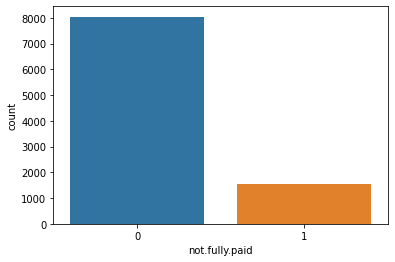

In [85]:
#look at counts of target value
sns.countplot(df['not.fully.paid'])

Text(0.5, 0, 'FICO')

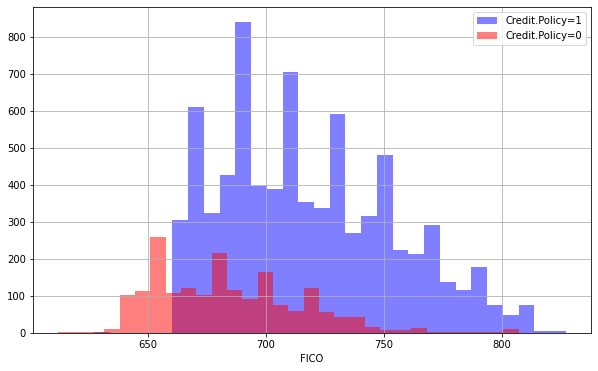

In [33]:
# Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.

plt.figure(figsize=(10,6))

#retrieve 'fico' data where credit.policy=1
df[df['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')

#retrieve 'fico' data where credit.policy=0
df[df['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')

plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'not.fully.paid')

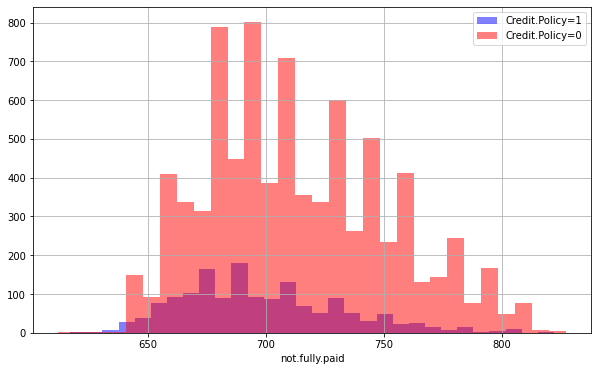

In [34]:
# Create a histogram of two FICO distributions on top of each other, one for each not.fully.paid outcome.

plt.figure(figsize=(10,6))

#retrieve 'fico' data where credit.policy=1
df[df['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')

#retrieve 'fico' data where credit.policy=0
df[df['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')

plt.legend()
plt.xlabel('not.fully.paid')

C:\Users\Devin\AppData\Local\Programs\Python\Python36-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='purpose', ylabel='count'>

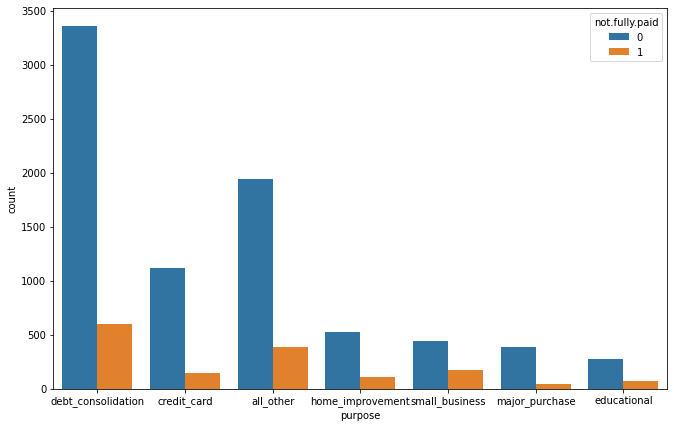

In [41]:
#** Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. **
plt.figure(figsize=(11,7))
sns.countplot(df['purpose'],hue=df['not.fully.paid'])

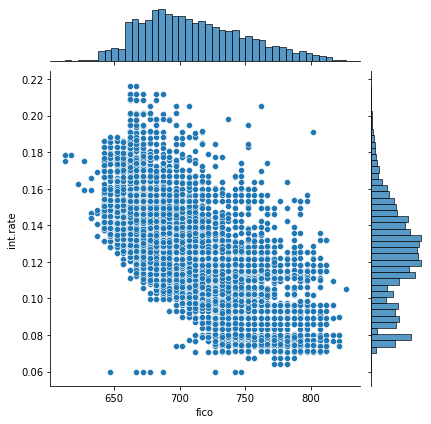

In [45]:
sns.jointplot(x=df['fico'],y=df['int.rate'],data=df)

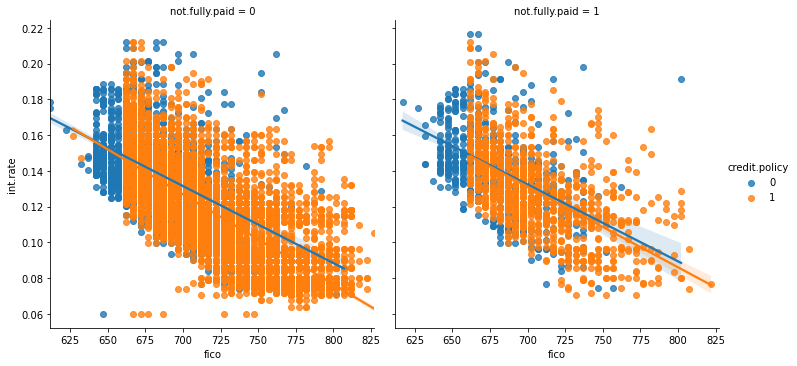

In [49]:
sns.lmplot(x='fico',y='int.rate',data=df,col='not.fully.paid',hue='credit.policy')

<a class="anchor" id="split_data"></a>
## Splitting the data into training and testing sets

Check data for categorical features, and create dummy variables as necessary

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1010.2+ KB


In [63]:
#create a dummy variable for 'purpose' feature

#**Create a list of 1 element containing the string 'purpose'. Call this list cat_feats.**

cat_feats = ['purpose']

**Now use pd.get_dummies(loans,columns=cat_feats,drop_first=True) to create a fixed larger dataframe that has new feature columns with dummy variables. Set this dataframe as final_data.**

In [65]:
final_data = pd.get_dummies(df,columns=cat_feats,drop_first=True)

In [66]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

Create feature and label datasets;

For the feature dataset, create a new dataset with only the feature attributes you want

In [67]:
#feature dataset
X = final_data.drop(['not.fully.paid'], axis=1)

In [22]:
#X.head()

In [68]:
#target dataset
y = final_data['not.fully.paid']

In [23]:
#y.head()

Split data into train and test sets

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
#random_state = 5, to tie out to 'towards data science' tutorial
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

<a class="anchor" id="tree_model"></a>
## Create and Train a Decision Tree Model

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
dtree = DecisionTreeClassifier()

In [73]:
#fit to training data
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

<a class="anchor" id="predict_dtree"></a>
## Predictions from our Decision Tree Model

Fit the model to our Test data, then compare the predictions to the actual values

In [74]:
#pass in data the model hasn't seen before (feature data set of our test data)
predictions = dtree.predict(X_test)

<a class="anchor" id="eval_metrics_dtree"></a>
## Evaluation Metrics: Decision Tree

In [75]:
from sklearn.metrics import classification_report,confusion_matrix

In [76]:
print(confusion_matrix(y_test,predictions))

[[2023  371]
 [ 362  118]]


In [77]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      2394
           1       0.24      0.25      0.24       480

    accuracy                           0.74      2874
   macro avg       0.54      0.55      0.55      2874
weighted avg       0.75      0.74      0.75      2874



<a class="anchor" id="rforest_model"></a>
## Create and Train a Random Forest Model

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
rfc=RandomForestClassifier(n_estimators=200)

In [80]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

<a class="anchor" id="predict_rforest"></a>
## Predictions from our Random Forest Model

In [81]:
rfc_pred = rfc.predict(X_test)


<a class="anchor" id="eval_metrics_rforest"></a>
## Evaluation Metrics: Random Forest

In [82]:
print(confusion_matrix(y_test,rfc_pred))

[[2391    3]
 [ 471    9]]


In [83]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2394
           1       0.75      0.02      0.04       480

    accuracy                           0.84      2874
   macro avg       0.79      0.51      0.47      2874
weighted avg       0.82      0.84      0.76      2874



In [84]:
df['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64